<a href="https://colab.research.google.com/github/ErmachenkoBoris/three-dimensional-computer-vision/blob/master/lab2_Ermachenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2
## Ермаченко Борис

In [1]:
import numpy as np
import cv2
from urllib.request import urlopen
import matplotlib.pyplot as plt

### 1. Читаем изображение из файла

In [2]:
url = "https://www.7petel.ru/pictures/l/c016.jpg"
# url = "https://autowog.ru/upload/iblock/7cd/7cd8c2e8d46a97d567f9fa4c91da50a3.jpg"
# загружаем изображение
resp = urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, -1)
cv2.imwrite("image.jpg", image)

True

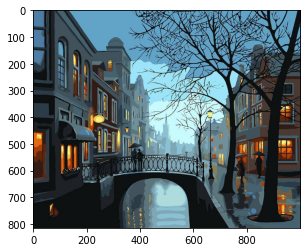

In [44]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### 2. Преобразовать избражение в YUV

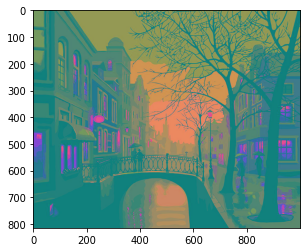

In [4]:
imageYUV = cv2.cvtColor(image, getattr(cv2,'COLOR_BGR2YUV'))
plt.imshow(imageYUV)

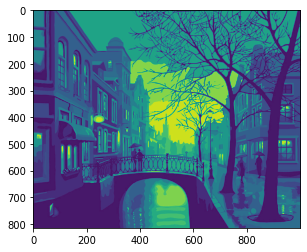

In [5]:
Y, u, v = cv2.split(imageYUV)
plt.imshow(Y)

### 3. Улучшить контраст

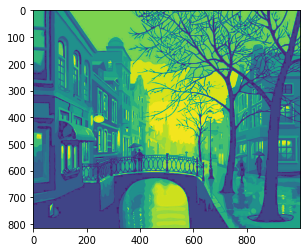

In [6]:
Y = cv2.equalizeHist(Y)
plt.imshow(Y)

### 4. Найти края объектов

In [7]:
edgesY = cv2.Canny(Y,100,200)

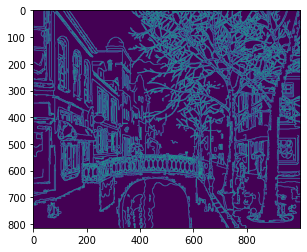

In [8]:
plt.imshow(edgesY)

### 5. Угловые точки

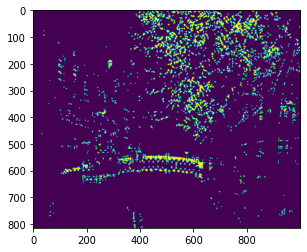

In [9]:
# find Harris corners
corners = np.float32(Y)
dst = cv2.cornerHarris(corners,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
plt.imshow(dst)

In [10]:
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(Y,np.float32(centroids),(5,5),(-1,-1),criteria)
print(corners)

[[493.4991    416.68643  ]
 [443.84525     4.5871825]
 [463.29675     6.3407955]
 ...
 [378.88528   802.2669   ]
 [406.58823   808.94116  ]
 [400.37323   811.3115   ]]


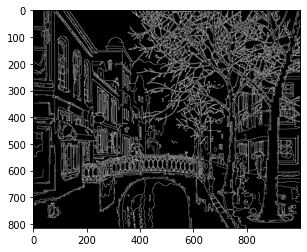

In [11]:

# Radius of circle
radius = 2
imageY = edgesY
for value in corners:
  center_coordinates = (round(value[0]), round(value[1]))
  color = (255, 255, 255)
  imageY = cv2.circle(imageY, center_coordinates, radius, color)
plt.imshow(cv2.cvtColor(imageY, cv2.COLOR_BGR2RGB))

### 6. Карта расстояний

In [12]:
D = cv2.distanceTransform(imageY, cv2.DIST_L2, 3)

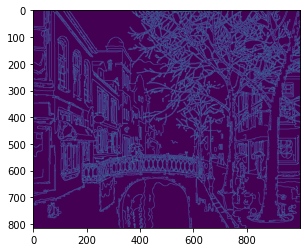

In [13]:
plt.imshow(D)

In [14]:
D

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 7. 8. Фильтрация, интегральное изображение

In [15]:
imageY_integral = cv2.integral(imageY)[1:,1:]

In [16]:
imageY_integral

array([[       0,        0,        0, ...,    32895,    32895,    32895],
       [       0,        0,        0, ...,    66300,    66300,    66300],
       [       0,        0,        0, ...,   104805,   104805,   104805],
       ...,
       [    7905,    16065,    25500, ..., 29511915, 29528490, 29547105],
       [    7905,    16065,    25500, ..., 29518545, 29535120, 29553735],
       [    7905,    16065,    25500, ..., 29522625, 29539200, 29557815]],
      dtype=int32)

In [17]:
D.shape

(814, 1000)

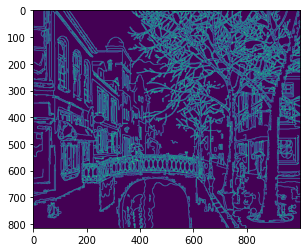

In [19]:
plt.imshow(imageY)

In [29]:
results = []
kVars = [1, 2, 3, 5, 10, 50, 100]
for  k in kVars:
  tmpResult = np.zeros(imageY.shape).astype('uint8')
  for i in range(D.shape[0]):
    for j in range(D.shape[1]):
      filterValue = round(k * D[i,j])
      maxI = i + filterValue 
      maxJ = j + filterValue 
      minI = i - filterValue 
      minJ = j - filterValue 

      if imageY_integral.shape[0]<=filterValue  + i:
        maxI = imageY_integral.shape[0] -1

      if imageY_integral.shape[1]<=filterValue  + j:
        maxJ = imageY_integral.shape[1] -1 

      if 0>=i-filterValue :
        minI = 0

      if 0>=j - filterValue :
        maxJ = 0

      sum = imageY_integral[maxI,maxJ] + imageY_integral[minI,minJ] - imageY_integral[maxI,minJ] - imageY_integral[minI,maxJ]
      if filterValue == 0:
        tmpResult[i, j] = Y[i, j]
      else:
        tmpResult[i, j] = sum / ((2*filterValue  + 1)**2)
  results.append(tmpResult.copy())
 

### 9. Обратное преобразование

k=  1


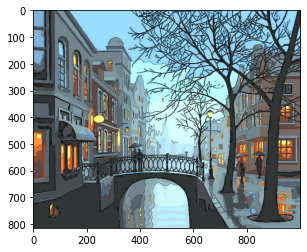

In [30]:
result = cv2.merge((results[0],u,v))
result = cv2.cvtColor(result, cv2.COLOR_YUV2BGR)
print('k= ', kVars[0])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

k=  2


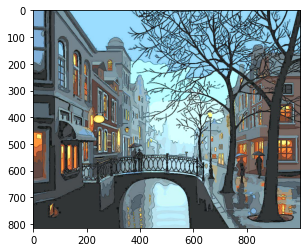

In [31]:
result = cv2.merge((results[1],u,v))
result = cv2.cvtColor(result, cv2.COLOR_YUV2BGR)
print('k= ', kVars[1])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

k=  3


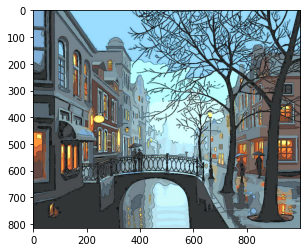

In [32]:
result = cv2.merge((results[2],u,v))
result = cv2.cvtColor(result, cv2.COLOR_YUV2BGR)
print('k= ', kVars[2])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

k=  5


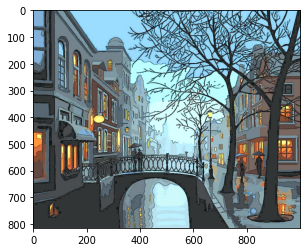

In [39]:
result = cv2.merge((results[3],u,v))
result = cv2.cvtColor(result, cv2.COLOR_YUV2BGR)
print('k= ', kVars[3])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

k=  10


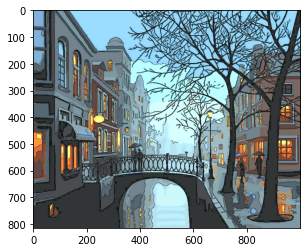

In [40]:
result = cv2.merge((results[4],u,v))
result = cv2.cvtColor(result, cv2.COLOR_YUV2BGR)
print('k= ', kVars[4])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

k=  50


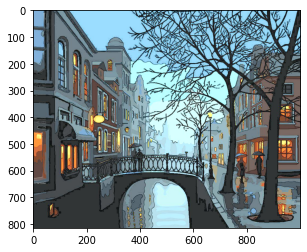

In [41]:
result = cv2.merge((results[5],u,v))
result = cv2.cvtColor(result, cv2.COLOR_YUV2BGR)
print('k= ', kVars[5])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

k=  100


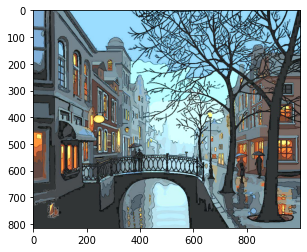

In [43]:
result = cv2.merge((results[6],u,v))
result = cv2.cvtColor(result, cv2.COLOR_YUV2BGR)
print('k= ', kVars[6])
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))